In [15]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

import pandas as pd 
import seaborn as sns

from wordcloud import WordCloud
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats='png'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
InlineBackend(InlineBackendConfig) options
----------------------------------------
InlineBackend.close_figures=<Bool>
    Close all figures at the end of each cell.
            When True, ensures that each cell starts with no active figures, but it
            also means that one must keep track of references in order to edit or
            redraw figures in subsequent cells. This mode is ideal for the notebook,
            where residual plots from other cells might be surprising.
            When False, one must call figure() to create new figures. This means
            that gcf() and getfigs() can reference figures created in other cells,
            and the active figure can continue to be edited with pylab/pyplot
            methods that reference the current active figure. This mode facilitates
            iterative editing of figures, and behaves most consistently with
            other mat

In [8]:
data = load_google_sheet()

[F] FUCTION: load_google_sheet()
[✔️] Completed: load_google_sheet() - Time taken: 3.49 seconds


In [9]:
data.head()

,time,rating,free_text,do_better
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.
3,2023-07-13 15:30:10,Extremely likely,Dr E was extremely nice,the receptionist was very unkind
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.


In [10]:
data['free_text_len'] = data['free_text'].str.split().apply(len)
data['do_better_len'] = data['do_better'].str.split().apply(len)

In [11]:
data.head()

,time,rating,free_text,do_better,free_text_len,do_better_len
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up,13,3
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,,4,0
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,8,5
3,2023-07-13 15:30:10,Extremely likely,Dr E was extremely nice,the receptionist was very unkind,5,5
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,44,6


<Axes: xlabel='free_text_len', ylabel='Count'>

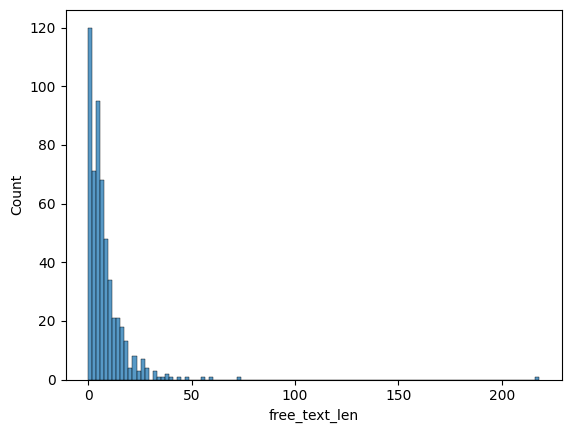

In [13]:
import seaborn as sns
sns.histplot(data=data, x='free_text_len')

<Axes: xlabel='do_better_len', ylabel='Count'>

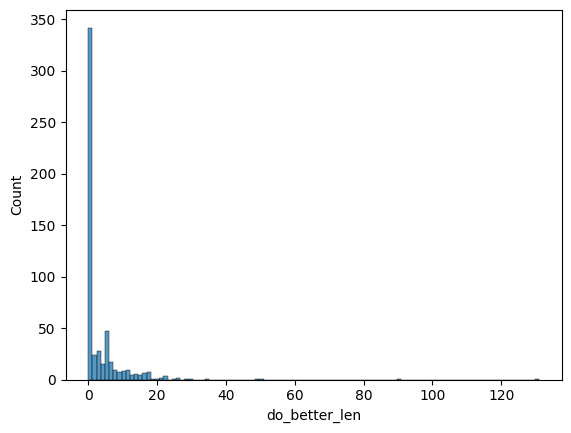

In [14]:
sns.histplot(data=data, x='do_better_len')

In [11]:
for text in data['do_better']:
    print(text)



no it was the best
the receptionist was very unkind
no i was happy with everything

no it is already perfect



i think it is getting better the ladies at the reception can be so rude it would not do any harm to smile be friendly put the patient at ease
the basement is a bit dark and gloomy and reception area could also do with an upgrade


earls court surgery is really lucky to have nurse alex


yes of course she showed me the easy and a great way to apply for my medicine


everything was done professionally
the staff and especially the gp are very good in service







everything  fine

can’t think of anything
yes they didnt have my xray for my arm  a waste off time for me there




sendn me to specialistthe best
more knowledge newly qualified doctors  enthusiastic



nothing i can think about







more doctors in the surgery

everything is good







every body enjoying to work 
i can feel it
more face to face appointment with the doctors
can’t think of anythink

doctor and al

if i can book an appointment face to face on the nhs app
nothing  everything was great
quicker response time







continue doing the amazing job that you are already doing
my visit was very straightforward and it went very well it could’ve been any better




not at this moment

just change all the front desk staff
quicker appointments

if results can be texted or emailed


i think stair rail not secure enough to downstairs and steep maybe instal a regular lift

friendly reception personnel and good doctors
happy with my experience of the service
more appointment slot if it’s possible


they are extremely excellent
no everything was first class




no my experience was  very positive
no everything ok


she is very knowledgeable and gives important advice and what’s more helps to treat you


because i have part broken leg and waiting for a new knee its hard to go down and up those stairs

everything is good
nothing special

reception  team needs to be more professional more helpful an

In [23]:
remove_list = []
for text in data['do_better']:
    if text == '':
        pass
    elif len(text) < 12 and len(text) > 1:
        remove_list.append(text)
        
print(remove_list)

['Keep it up', 'No', 'No', 'No', 'No answer ', 'wait time', 'No', 'Yes ', 'No', 'No. Fine ', 'No', 'No', 'No', 'Not really\n', 'No', 'None', 'No nothinh', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'None', 'No', 'Not really ', 'NO', 'Nothings ', 'No', 'No', 'Nothing ', 'No', 'No', 'No', 'All good', 'Reminder', 'No', 'N/A', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No ', 'No really ', 'No. ', 'No', 'All good', 'None', 'No', 'No', 'No :)', 'Nothing', 'Not at all', 'No', 'Excellent ', 'No', 'No', 'No', 'No', 'Thanks ', 'No', 'No', 'Not really ', 'No', 'NO.', 'None ', 'No', 'No', 'No ', 'None', 'Thank you 😊', 'Thank you 😊', 'Nope ', 'Nothing', 'No', 'No', 'No', 'None ', 'No', 'No', 'No', 'No', ' No', 'No', 'No', 'No', 'Nothing. ', 'No', 'Nothing ', 'no', 'No', 'No ', 'No', 'None ', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Nothing ', 'That’s all ', 'No', 'No nothing ', 'No tks', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No.', 'No', 'No', 'Nothing', 'No', 'Nathing', 'No', 'non

In [18]:
data.isna().sum()

time         0
rating       0
free_text    0
do_better    0
dtype: int64